In [23]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("Project-II/Fraud.csv")
#print(data.head())

In [24]:
size,dim = data.shape
print(f"There are {size} online payments and {dim} variables.")
data = data.drop('isFlaggedFraud', axis=1)
print(data.head())

There are 6362620 online payments and 11 variables.


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


Check for missing values

In [3]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [ ]:
# Exploring transaction type
#print(data.type.value_counts())

In [25]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

In [26]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
#data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
#print(data.head())

In [27]:
# Checking correlation
correlation = data.iloc[:,[0,1,2,4,5,7,8,9]].corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
#data["isFraud"] = data["isFraud"].map({0: "No", 1: "Yes"})
data['step'].value_counts()

### Oline payments Fraud Dtection models

In [28]:
from sklearn.model_selection import train_test_split

# splitting the data
X = np.array(data[["amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

# training a decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Grid Search

In [ ]:
# GRID SEARCH
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight': ['balanced', 'auto']
    'max_depth': [4, 6, 8, 10]
}
grid_search = GridSearchCV(
estimator = DecisionTreeClassifier(random_state=42),
param_grid = param_grid,
scoring = 'recall', 
cv = 3)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best Recall: ", grid_search.best_score_)

### Metrics Visualization


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.92      0.98      0.95       817

    accuracy                           1.00    636262
   macro avg       0.96      0.99      0.97    636262
weighted avg       1.00      1.00      1.00    636262

ROC-AUC: 0.9907634202278836
Precision-Recall Auc: 0.9496419296862315


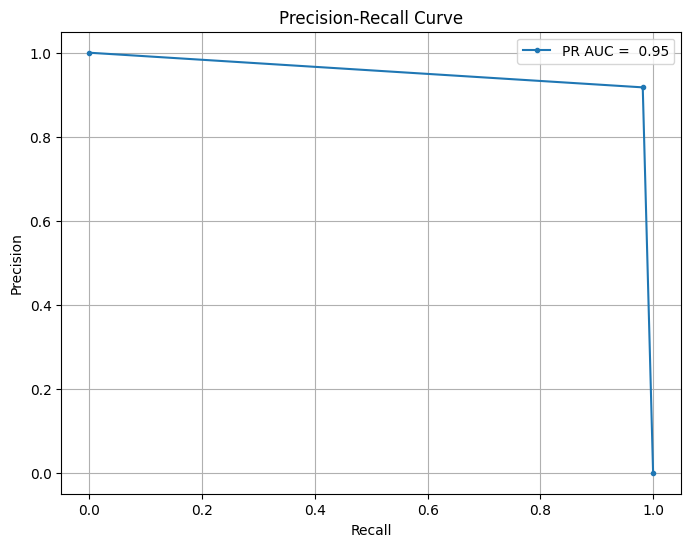

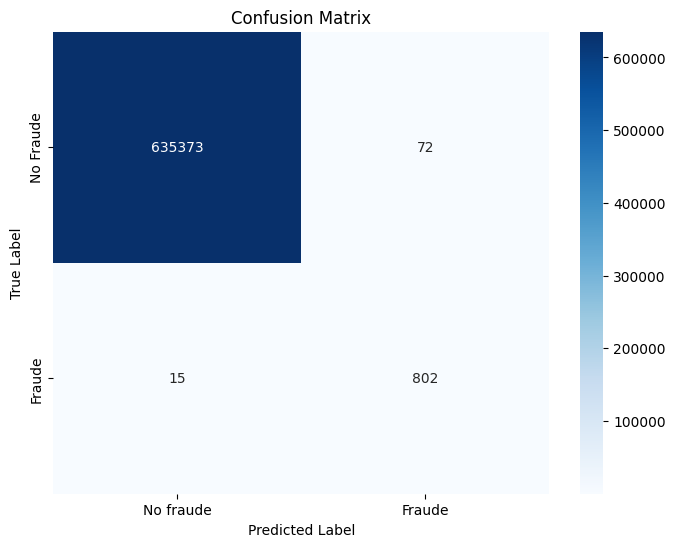

In [34]:
# Visualizacion de resultados
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, auc
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


report = classification_report(y_test,y_pred)
print(report)

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc}")

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall Auc: {pr_auc}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker = '.', label = f'PR AUC = {pr_auc: .2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['No fraude', 'Fraude'], yticklabels = ['No Fraude', 'Fraude'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



### Decision trees

In [33]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
class_weight = 'balanced',
random_state=42)
model.fit(X_train, y_train)

'''
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.90      0.89      0.90       817

    accuracy                           1.00    636262
   macro avg       0.95      0.94      0.95    636262
weighted avg       1.00      1.00      1.00    636262

ROC-AUC: 0.9448590663239853
Precision-Recall Auc: 0.8965439612491307
'''
# Con weight_class = 'balanced' :
'''
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.92      0.88      0.90       817

    accuracy                           1.00    636262
   macro avg       0.96      0.94      0.95    636262
weighted avg       1.00      1.00      1.00    636262

ROC-AUC: 0.94242052810975
Precision-Recall Auc: 0.9007212341040662
'''
# Quitando la variable "type" del entrenamiento

'''          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.92      0.98      0.95       817

    accuracy                           1.00    636262
   macro avg       0.96      0.99      0.97    636262
weighted avg       1.00      1.00      1.00    636262
'''

'          \n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    635445\n           1       0.92      0.98      0.95       817\n\n    accuracy                           1.00    636262\n   macro avg       0.96      0.99      0.97    636262\nweighted avg       1.00      1.00      1.00    636262\n'

### Random Forest

In [ ]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
n_estimators = 100,
random_state = 42)

model.fit(X_train, y_train)

'''
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.92      0.89      0.91       817

    accuracy                           1.00    636262
   macro avg       0.96      0.95      0.95    636262
weighted avg       1.00      1.00      1.00    636262

ROC-AUC: 0.9956702544240986
Precision-Recall Auc: 0.9659164838130454

'''
#Con class_weight = 'balanced' :
'''
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.92      0.89      0.90       817

    accuracy                           1.00    636262
   macro avg       0.96      0.94      0.95    636262
weighted avg       1.00      1.00      1.00    636262

ROC-AUC: 0.9968962266855792
Precision-Recall Auc: 0.9668656031185896
'''

### Gradient Boosting

In [ ]:
# GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
n_estimators=100, 
random_state=42)

model.fit(X_train, y_train)

'''
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.50      0.00      0.00       817

    accuracy                           1.00    636262
   macro avg       0.75      0.50      0.50    636262
weighted avg       1.00      1.00      1.00    636262

ROC-AUC: 0.5752146918735705
Precision-Recall Auc: 0.09484313355696973
'''

### XGBoost

In [ ]:
# MODELO XGBoost

from xgboost import XGBClassifier

model = XGBClassifier (
n_estimators = 300,
learning_rate = 0.1,
class_weight='balanced',
random_state = 42)

model.fit(X_train, y_train)

'''
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.90      0.78      0.83       817

    accuracy                           1.00    636262
   macro avg       0.95      0.89      0.92    636262
weighted avg       1.00      1.00      1.00    636262

ROC-AUC: 0.9996006326121193
Precision-Recall Auc: 0.920761258323663 
'''

### Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
model = LogisticRegression(random_state=42, max_iter=1000)

# they require scaling

# Fit the model
model.fit(X_train, y_train)
# Sin "type"
'''
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.73      0.98      0.84       817

    accuracy                           1.00    636262
   macro avg       0.86      0.99      0.92    636262
weighted avg       1.00      1.00      1.00    636262
'''

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



'\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    635445\n           1       0.73      0.98      0.84       817\n\n    accuracy                           1.00    636262\n   macro avg       0.86      0.99      0.92    636262\nweighted avg       1.00      1.00      1.00    636262\n'

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Create a SVM model
clf = SVC(random_state=42)

# they require scaling

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))